In [136]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

In [137]:
df = pd.read_csv('vectorized_data.zip')

In [138]:
df.columns

Index(['Polls ID', 'Poll Responses Response', 'Assessment reports Hashtag',
       'Assessment reports Score', 'time_stamp', 'tokenized_responses',
       'stemmed_responses', 'clean_responses', 'string', 'LOs/ HCs', 'College',
       'Course', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula',
       'lex_data_prep', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 'vec',
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20'],
      dtype='object')

## Random sampling for grade class imbalance

In [139]:
sample_len = df[df['Assessment reports Score'] == 2].shape[0]

sample_3 = df[df['Assessment reports Score'] == 3].sample(n= sample_len)
sample_4 = df[df['Assessment reports Score'] == 4].sample(n= sample_len)

#concatenate the dataframes
df = pd.concat([df[df['Assessment reports Score'] == 2], sample_3, sample_4], axis=0)

In [140]:
# X exclude categorical data
X = df[['time_stamp','flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20']]
y = df['Assessment reports Score']

In [141]:
len(X.columns)

40

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [143]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [144]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [145]:
feature_tables = pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=X.columns).T
feature_tables.sort_values(by=0, ascending=False)

,0
linsear_write_formula,0.273195
automated_readability_index,0.206639
words_count,0.066706
unique_words,0.056639
time_stamp,0.029079
Dugast,0.024218
rttr,0.019402
vec_16,0.018003
herdan,0.017373
mtld,0.016503


In [146]:
y_pred = regressor.predict(X_test)

In [147]:
mean_squared_error(y_test, y_pred)

0.5775938739276183

In [148]:
predictions = [round(value) for value in y_pred]

In [149]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 37.07%


In [150]:
train_score = classification_report(y_test, predictions)
print(train_score)

              precision    recall  f1-score   support

           2       0.66      0.13      0.21      5272
           3       0.34      0.93      0.50      5277
           4       0.66      0.05      0.10      5279

    accuracy                           0.37     15828
   macro avg       0.55      0.37      0.27     15828
weighted avg       0.55      0.37      0.27     15828



## Cross validation

In [151]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(regressor, X, y, cv=kf)

In [152]:
for fold, score in enumerate(scores):
    print(f'Fold {fold+1}: {score:.3f}')

# Print the overall accuracy
print(f'Overall Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Fold 1: 0.143
Fold 2: 0.131
Fold 3: 0.133
Fold 4: 0.122
Fold 5: 0.144
Overall Accuracy: 0.134 (+/- 0.016)


## PCA

### Apply feature scaling 

In [153]:
# copying the data
X_copy = X.copy()
columns = X_copy.columns

In [154]:
# Apply feature scaling 
scaler = StandardScaler()
X_copy = scaler.fit_transform(X_copy)
X_copy = pd.DataFrame(X_copy, columns= columns)
X_copy.head()

,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,hdd,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
0,-1.592171,1.677881,-1.715008,-2.088607,0.0,-0.847039,0.992953,0.104851,-1.714801,0.696984,...,1.447824,0.977863,-0.088478,0.268022,2.487139,0.380057,1.023862,0.598337,0.711959,-0.739506
1,-1.592171,0.798717,-1.257195,-1.756923,0.0,-0.940182,0.776007,-0.284561,-1.456160,-0.147970,...,1.186845,0.946006,1.271144,0.069755,1.365601,-0.709506,1.060361,2.138178,1.559845,1.231449
2,-1.592171,1.607216,-2.033487,-1.709256,0.0,-1.747419,-0.070079,-0.603170,-1.779461,0.626958,...,1.004652,-0.315448,-0.033843,-0.677792,0.619311,-1.733905,-0.019962,-0.423359,1.554897,0.045329
3,-1.592171,2.275422,-2.192726,-1.949578,0.0,-1.731895,-0.789098,-1.871707,-1.650141,0.771810,...,0.481882,0.342325,-0.499584,-1.390693,-0.618023,-2.128928,0.525588,-1.648341,0.660608,-0.622112
4,-1.591951,1.097487,-0.859097,-0.988291,0.0,-0.536563,-0.246735,0.317257,-0.744898,0.244666,...,0.401081,0.001963,-0.981186,-0.603401,0.616157,-0.495868,1.007244,1.907325,0.625217,-0.757446


Text(0.5, 1.0, 'PCA cumulative explained variance')

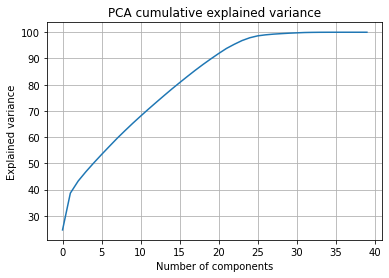

In [155]:
import numpy as np
from sklearn.decomposition import PCA
# Use 100 components to see explained variance 
pca_40 = PCA(n_components = 40)
pca_40.fit(X_copy)

plt.grid()
plt.plot(np.cumsum(pca_40.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('PCA cumulative explained variance')

In [156]:
#Explained variance ratio with numbers of components

import pandas as pd
explained_var = np.cumsum(pca_40.explained_variance_ratio_ * 100).reshape(-1, 1)
num_comps = [i+1 for i in range(40)]
explained_var
explained_var_df = pd.DataFrame(explained_var,index=num_comps, columns = ['Explained Variance Ratio'])
explained_var_df

,Explained Variance Ratio
1,24.625327
2,38.642747
3,43.249070
4,46.842191
5,50.176427
6,53.377729
7,56.487981
8,59.564149
9,62.464003
10,65.289671


In [157]:
def pca_results(full_dataset, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    
    #use the number of componenets to create dimensions 
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # use PCA components to create a dataframe: columns = variables, rows = component values
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.columns)
    components.index = dimensions#change index to dimensions 
    
    # PCA explained variance 
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    #make explained variance into a column format
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    return pd.concat([variance_ratios, components], axis = 1) #put explained variance and component df together 


def pca_plot(pca_results_df , nth_component):
    
    explain_variance = pca_results_df['Explained Variance'][:nth_component]
    accu_explain_variance = np.round(explain_variance.sum(),4)

    
    sort_comp = pca_results_df.iloc[nth_component-1, 1:].sort_values()
    head = sort_comp[:5]  #largest five variables in a component
    tail = sort_comp[-5:] #smallest five variables in a component
    components = pd.concat([head, tail])
    
    # Plot the components 
    components.plot(kind='bar', title='Component ' + str(nth_component), color = 'c')
    ax = plt.gca()
    ax.grid(linewidth='0.5', alpha=0.5)

    plt.show()
    print('Accumulative explained varaince for Component',nth_component,'is',accu_explain_variance)
    return components

In [158]:
pca_results_40 = pca_results(X, pca_40)
pca_results_40

,Explained Variance,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
Dimension 1,0.2463,-0.0244,0.2272,-0.2412,-0.2384,-0.0000,-0.2499,-0.1748,-0.1949,-0.2255,...,0.0273,-0.0341,0.0053,0.0327,-0.0038,-0.0382,0.0367,0.0458,-0.0944,0.0201
Dimension 2,0.1402,0.1092,-0.1849,0.2674,0.2580,-0.0000,0.2499,-0.0043,-0.0861,0.2846,...,-0.0203,-0.0201,-0.0161,0.0129,-0.0084,0.0231,-0.0248,0.0078,-0.0137,0.0093
Dimension 3,0.0461,-0.0461,-0.3196,0.0829,0.0078,-0.0000,0.0542,0.4596,0.3350,-0.0173,...,-0.0962,0.3532,0.0075,0.1210,0.0729,0.0618,-0.1537,-0.0960,0.0056,-0.2023
Dimension 4,0.0359,-0.0126,-0.0189,-0.0032,-0.0054,0.0000,0.0089,0.0729,-0.0242,-0.0010,...,0.2096,0.1807,-0.3740,-0.2780,0.0617,-0.2442,0.0890,-0.1593,0.2360,-0.0631
Dimension 5,0.0333,0.0759,0.0054,-0.0117,-0.0151,0.0000,-0.0092,0.0076,0.0547,-0.0193,...,-0.0891,0.1228,-0.0206,-0.0584,-0.0294,0.3831,-0.2706,0.0706,0.2905,-0.1187
Dimension 6,0.0320,-0.3850,0.0343,-0.0103,0.0042,-0.0000,0.0217,0.0274,-0.1140,0.0129,...,0.1128,0.0931,-0.1216,-0.1261,0.0069,-0.3603,0.0153,-0.4435,-0.0804,0.0332
Dimension 7,0.0311,-0.0593,0.0172,-0.0325,-0.0351,0.0000,-0.0038,0.0799,-0.1069,-0.0292,...,0.2714,0.0221,-0.1181,-0.1044,0.6663,0.0730,0.0230,0.1628,0.3941,0.1207
Dimension 8,0.0308,0.0406,0.0247,-0.0169,-0.0230,0.0000,0.0040,0.0236,0.0469,-0.0195,...,-0.1326,0.2461,0.2847,-0.1921,0.0651,-0.0027,0.2117,-0.2855,0.0332,0.1920
Dimension 9,0.0290,-0.1540,0.0174,-0.0057,-0.0069,-0.0000,-0.0037,-0.0224,0.0147,0.0001,...,-0.2826,0.1485,0.1432,-0.1433,0.1091,-0.1745,-0.0475,0.2637,0.0754,0.2388
Dimension 10,0.0283,0.1775,0.0611,0.0051,0.0460,-0.0000,-0.0182,-0.1902,0.0498,0.0391,...,-0.2057,-0.3142,-0.0117,0.1057,0.4775,-0.1990,-0.1722,-0.1411,-0.0527,-0.4902


In [159]:
pca_results_40.iloc[0]

Explained Variance              0.2463
time_stamp                     -0.0244
flesch_reading_ease             0.2272
flesch_kincaid_grade           -0.2412
gunning_fog                    -0.2384
smog_index                     -0.0000
automated_readability_index    -0.2499
coleman_liau_index             -0.1748
dale_chall_readability_score   -0.1949
linsear_write_formula          -0.2255
hdd                            -0.2630
Summer                         -0.2252
Dugast                         -0.1542
words_count                    -0.1929
unique_words                   -0.2732
ttr                            -0.1314
rttr                           -0.3053
cttr                           -0.3053
mtld                           -0.2404
herdan                         -0.2003
maas                            0.2406
vec_1                           0.0442
vec_2                           0.0028
vec_3                           0.0267
vec_4                          -0.0286
vec_5                    

In [160]:
#Reapply PCA with 25 components
pca_25 = PCA(25)
pca_features_25 = pca_25.fit_transform(X_copy)

In [161]:
print(pca_features_25.shape)
print(np.cumsum(pca_25.explained_variance_ratio_))

(63312, 25)
[0.24625327 0.38642747 0.4324907  0.46842191 0.50176427 0.53377729
 0.56487981 0.59564149 0.62464003 0.65289671 0.68007499 0.70672537
 0.7326479  0.75823974 0.78343885 0.80769915 0.8315454  0.85487493
 0.87715895 0.89836997 0.91883613 0.93816283 0.95400421 0.96828719
 0.97902965]


Text(0.5, 1.0, 'PCA cumulative explained variance')

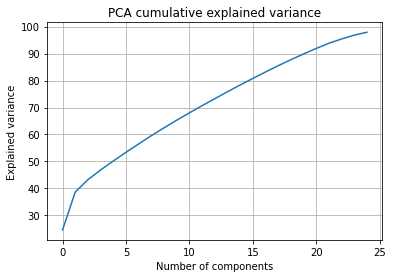

In [162]:
plt.grid()
plt.plot(np.cumsum(pca_25.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('PCA cumulative explained variance')


In [163]:
pca_features_25

array([[ 0.26741414, -5.31477923,  0.10718485, ..., -0.12763004,
         0.04633476, -0.27274179],
       [ 3.15945872, -2.6467515 ,  1.03540675, ..., -0.9254242 ,
         0.09019559, -0.01245948],
       [ 1.84980372, -5.4457302 , -0.07089244, ...,  0.39230683,
        -0.18180819,  0.03776993],
       ...,
       [-0.58753714,  2.05497018, -1.27185732, ..., -0.49306974,
         0.54715824,  0.97522048],
       [-1.33816458,  2.29517343, -3.18724121, ...,  0.27952858,
        -0.12970838, -0.23972975],
       [ 0.5159423 ,  3.30259717,  0.90370597, ..., -0.00664323,
         1.15696219, -0.40079247]])

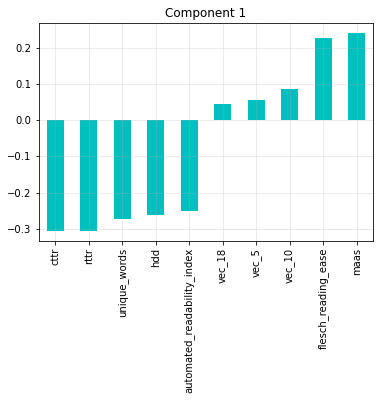

Accumulative explained varaince for Component 1 is 0.2463


cttr                          -0.3053
rttr                          -0.3053
unique_words                  -0.2732
hdd                           -0.2630
automated_readability_index   -0.2499
vec_18                         0.0458
vec_5                          0.0556
vec_10                         0.0873
flesch_reading_ease            0.2272
maas                           0.2406
Name: Dimension 1, dtype: float64

In [164]:
pca_results_25 = pca_results(X, pca_25)
pca_results_25
pca_plot(pca_results_25, 1)

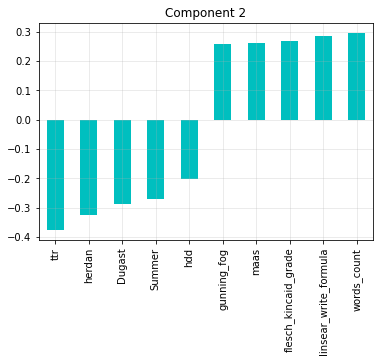

Accumulative explained varaince for Component 2 is 0.3865


ttr                     -0.3781
herdan                  -0.3239
Dugast                  -0.2879
Summer                  -0.2700
hdd                     -0.2014
gunning_fog              0.2580
maas                     0.2602
flesch_kincaid_grade     0.2674
linsear_write_formula    0.2846
words_count              0.2967
Name: Dimension 2, dtype: float64

In [165]:
pca_plot(pca_results_25, 2)

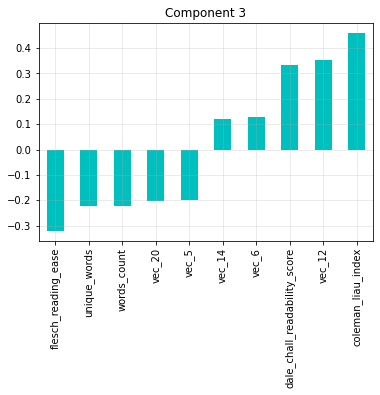

Accumulative explained varaince for Component 3 is 0.4326


flesch_reading_ease            -0.3196
unique_words                   -0.2232
words_count                    -0.2218
vec_20                         -0.2023
vec_5                          -0.1994
vec_14                          0.1210
vec_6                           0.1283
dale_chall_readability_score    0.3350
vec_12                          0.3532
coleman_liau_index              0.4596
Name: Dimension 3, dtype: float64

In [166]:
pca_plot(pca_results_25, 3)

In [167]:
#train test split
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(pca_features_25, y, test_size=0.20, random_state=123)

In [168]:
regressor_pca = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

regressor_pca.fit(X_train_pca, Y_train_pca)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [169]:
y_pred_pca = regressor_pca.predict(X_test_pca)

In [170]:
predictions_pca = [round(value) for value in y_pred_pca]

In [171]:
# evaluate predictions
accuracy = accuracy_score(Y_test_pca, predictions_pca)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 35.06%


In [172]:
train_score = classification_report(Y_test_pca, predictions_pca)
print(train_score)

              precision    recall  f1-score   support

           2       0.66      0.08      0.15      4212
           3       0.34      0.96      0.50      4197
           4       0.59      0.01      0.02      4254

    accuracy                           0.35     12663
   macro avg       0.53      0.35      0.22     12663
weighted avg       0.53      0.35      0.22     12663



In [173]:
mean_squared_error(Y_test_pca, predictions_pca)

0.6631130063965884

## Cross validation

In [174]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(regressor_pca, pca_features_25, y, cv=kf)

In [175]:
for fold, score in enumerate(scores):
    print(f'Fold {fold+1}: {score:.3f}')

# Print the overall accuracy
print(f'Overall Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Fold 1: 0.097
Fold 2: 0.090
Fold 3: 0.083
Fold 4: 0.084
Fold 5: 0.098
Overall Accuracy: 0.090 (+/- 0.013)


In [176]:
pca_results_25 = pca_results(X, pca_25)
pca_results_25

,Explained Variance,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
Dimension 1,0.2463,-0.0244,0.2272,-0.2412,-0.2384,0.0,-0.2499,-0.1748,-0.1949,-0.2255,...,0.0273,-0.0341,0.0053,0.0327,-0.0038,-0.0382,0.0367,0.0458,-0.0944,0.0201
Dimension 2,0.1402,0.1092,-0.1849,0.2674,0.2580,0.0,0.2499,-0.0043,-0.0861,0.2846,...,-0.0203,-0.0201,-0.0161,0.0129,-0.0084,0.0231,-0.0248,0.0078,-0.0137,0.0093
Dimension 3,0.0461,-0.0461,-0.3196,0.0829,0.0078,-0.0,0.0542,0.4596,0.3350,-0.0173,...,-0.0962,0.3532,0.0075,0.1210,0.0729,0.0618,-0.1537,-0.0960,0.0056,-0.2023
Dimension 4,0.0359,-0.0126,-0.0189,-0.0032,-0.0054,-0.0,0.0089,0.0729,-0.0242,-0.0010,...,0.2096,0.1807,-0.3740,-0.2780,0.0617,-0.2442,0.0890,-0.1593,0.2360,-0.0631
Dimension 5,0.0333,0.0759,0.0054,-0.0117,-0.0151,-0.0,-0.0092,0.0076,0.0547,-0.0193,...,-0.0891,0.1228,-0.0206,-0.0584,-0.0294,0.3831,-0.2706,0.0706,0.2905,-0.1187
Dimension 6,0.0320,-0.3850,0.0343,-0.0103,0.0042,-0.0,0.0217,0.0274,-0.1140,0.0129,...,0.1128,0.0931,-0.1216,-0.1261,0.0069,-0.3603,0.0153,-0.4435,-0.0804,0.0332
Dimension 7,0.0311,-0.0593,0.0172,-0.0325,-0.0351,0.0,-0.0038,0.0799,-0.1069,-0.0292,...,0.2714,0.0221,-0.1181,-0.1044,0.6663,0.0730,0.0230,0.1628,0.3941,0.1207
Dimension 8,0.0308,0.0406,0.0247,-0.0169,-0.0230,-0.0,0.0040,0.0236,0.0469,-0.0195,...,-0.1326,0.2461,0.2847,-0.1921,0.0651,-0.0027,0.2117,-0.2855,0.0332,0.1920
Dimension 9,0.0290,-0.1540,0.0174,-0.0057,-0.0069,0.0,-0.0037,-0.0224,0.0147,0.0001,...,-0.2826,0.1485,0.1432,-0.1433,0.1091,-0.1745,-0.0475,0.2637,0.0754,0.2388
Dimension 10,0.0283,0.1775,0.0611,0.0051,0.0460,-0.0,-0.0182,-0.1902,0.0498,0.0391,...,-0.2057,-0.3142,-0.0117,0.1057,0.4775,-0.1990,-0.1722,-0.1411,-0.0527,-0.4902
